<a href="https://colab.research.google.com/github/KaueAbbe/Projeto-Estude_Python/blob/main/Estude%20Machine%20Learning/Validar%20Modelos/ValidarModelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 6 color ='blue'> Aprendendo Validação </font>

Este notebook se baseou em cursos da alura cursos online e estudos próprios:
1.  Machine Learning: Validação de Modelos
2. Ainda irei Fazer e Anotar

As bibliotecas que serão usadas:
1. Pandas e Numpy
2. Scikit-learn
3. Plotly
4. Spotipy
5. matplotlib

**OBJETIVO:**
Compreender a motivação de melhorar a validação. Melhorar a validação de um modelo. Discernir diferenças cruciais no momento de validação.

**RESUMO DO QUE FOI FEITO:** \
Utilizei modelo de Machine Learning e verifiquei a acurácia de cada modelo. Depois validei os modelos utilizando validação cruzada, que consiste em alternar os dados de treino e teste aleatoriamente.Depois, utilizei a estratificação e Dados Agrupáveis para aumentar a validação do modelo.


**Consideração Final:** \
Validação é um próximo passo a ser inserido nos projetos de Machine Learning, como etapa final. Validar o modelo é necessário e deve ser feito para que se tenha conhecimento definido da precisa acurácia e intervalo de confiança do nosso modelo. O objetivo durante este estudo foi atendido, e como ponto crucial eu destaco *Validação cruzada e estratificação utilizando uma Pipeline para melhorar a análise do modelo*.


# Leitura de Arquivos

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv'
dados = pd.read_csv(uri).drop('Unnamed: 0', axis = 1)

In [3]:
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


# Modelo LinearSVC

SVC é do suport vector..


In [4]:
x = dados[["preco", "idade_do_modelo","km_por_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)
     

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 58.00%


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Dummy Classifier

Uma forma de validar o modelo é compará-lo com outro modelo, mas um modelo que não tem tantos parâmetros de decisão. Chamamos esse modelo de Dummy, pois ele seria um modelo bobo. 

O Dummy se assemelha ao grupo controle de um processo de teste. É com o grupo controle que se faz a comparação entre o grupo que recebeu nada e o grupo que recebeu o tratamento.

In [5]:

from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 58.00%


## Separando por Treino e Teste

In [6]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


## Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
SEED = 158020
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.00%


In [9]:
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


* O ponto aqui é a alteração da acurácia após alteração da SEED. Por representar valores diferentes (diferença de acurácia de 3%) precisamos de formas melhores de classificar a qualidade do nosso modelo. Com outras SEEDS é pode ser a acurácia diminuia, e o modelo seria classificado como ruim. 

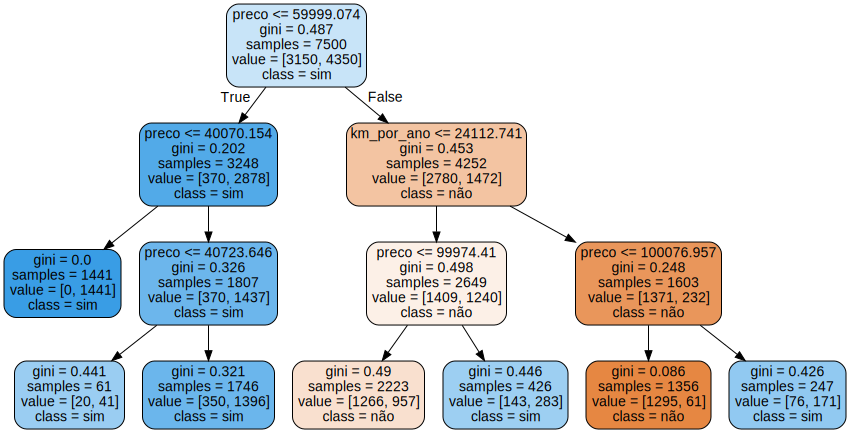

In [10]:

from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico
     

# Validação Cruzada

É uma forma de alterar os dados que são passados para o modelo treinar, como quem cruza os dados que são passados, e obter a acurácia de cada treino. Com mais de 1 valor de acurácio podemos tirar a média para assim determinar o valor da acurácia. 

O processo de separar os dados em k partes para realizar a validação cruzadas é chamada de k-fold.

[validação cruzada](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

* Importante: Papers científicos afirmam que valores entre 5 ou 10 é um ótimo valor para fazer a validação cruzada.

In [11]:
from sklearn.model_selection import cross_validate

In [12]:
SEED = 42
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x, y, cv = 3)
print(results['test_score'])

media = results['test_score'].mean()
std = results['test_score'].std()

print('acuracia: [%.2f, %.2f]'%( (media-2*std)*100, (media+2*std)*100))

[0.75704859 0.7629763  0.75337534]
acuracia: [74.99, 76.57]


In [13]:
SEED = 42
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x, y, cv = 5)
print(results['test_score'])

media = results['test_score'].mean()
std = results['test_score'].std()

print('acuracia: [%.2f, %.2f]'%( (media-2*std)*100, (media+2*std)*100))

[0.756  0.7565 0.7625 0.7545 0.7595]
acuracia: [75.21, 76.35]


## Embaralhar os dados pra validação cruzada

* Outra forma de fazer o cross_validate é embaralhar os dados, algo que este módulo não faz. O objetivo deste é aplicar uma aleatoriedade no momento de realziar a validação cruzada.

[KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

In [14]:
from sklearn.model_selection import KFold

In [15]:
def imprime_resultados(results):
  media = results['test_score'].mean()
  std = results['test_score'].std()
  print('acuracia media: [%.2f]'%( media*100))
  print('acuracia intervalo: [%.2f, %.2f]'%( (media-2*std)*100, (media+2*std)*100))

In [16]:
#SEM SHUFFLE
SEED = 42
np.random.seed(SEED)

cv = KFold(n_splits = 10)

modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x, y, cv = cv)
imprime_resultados(results)

acuracia media: [75.78]
acuracia intervalo: [74.37, 77.19]


In [17]:
#COM SHUFFLE
SEED = 42
np.random.seed(SEED)

cv = KFold(n_splits = 10, shuffle = True)

modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x, y, cv = cv)
imprime_resultados(results)

acuracia media: [75.76]
acuracia intervalo: [72.76, 78.76]


# Estratificação

* O problema que pode ocorrer aqui é existir um desbalanceamento entre dados que são 1 ou 0. Se isto ocorrer então poderá ocorrer a situação em que o treino apenas treina com apenas um dos valores.

[KFold Estratificado](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)

In [18]:
dados_azar = dados.sort_values('vendido')
dados_azar

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704
...,...,...,...,...
5491,71910.43,1,9,25778.40812
1873,30456.53,1,6,15468.97608
1874,69342.41,1,11,16909.33538
5499,70520.39,1,16,19622.68262


In [19]:
dados_azar[dados_azar['vendido']==0]['vendido'].value_counts()

0    4200
Name: vendido, dtype: int64

In [20]:
dados_azar[dados_azar['vendido']==1]['vendido'].value_counts()

1    5800
Name: vendido, dtype: int64

* Existe uma proximidade entre a quantidade de 0 e de 1. O que possibilita realizar um shuffle. Caso houve um desbalanceamento muito alto até mesmo o shuffle não ocorreria com precisão. 

In [21]:
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]

In [22]:
#SEM SHUFFLE
SEED = 42
np.random.seed(SEED)

cv = KFold(n_splits = 10)

modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv)
imprime_resultados(results)

acuracia media: [57.84]
acuracia intervalo: [34.29, 81.39]


In [23]:
#COM SHUFFLE
SEED = 42
np.random.seed(SEED)

cv = KFold(n_splits = 10, shuffle = True)

modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv)
imprime_resultados(results)

acuracia media: [75.78]
acuracia intervalo: [73.65, 77.91]


In [24]:
from sklearn.model_selection import StratifiedKFold

In [25]:
#COM SHUFFLE ESTRATIFICADO
SEED = 42
np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 10, shuffle = True)

modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv)
imprime_resultados(results)

acuracia media: [75.79]
acuracia intervalo: [73.14, 78.44]


# Dados Agrupáveis

[group kfol](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupKFold.html)

In [26]:
from sklearn.model_selection import GroupKFold

In [27]:
np.random.seed(SEED)

dados['modelo_aleatorio'] = dados.idade_do_modelo + np.random.randint(-2,3, size = 10000)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo_aleatorio
0,30941.02,1,18,35085.22134,19
1,40557.96,1,20,12622.05362,22
2,89627.50,0,12,11440.79806,12
3,95276.14,0,3,43167.32682,5
4,117384.68,1,4,12770.11290,6


In [28]:
dados['modelo_aleatorio'] = abs(dados['modelo_aleatorio'])

In [29]:
dados.modelo_aleatorio.unique()

array([19, 22, 12,  5,  6, 10, 16, 17,  3, 11, 14, 15, 13,  9,  1,  8, 20,
       18, 21,  7,  2,  0,  4])

In [30]:
#COM SHUFFLE ESTRATIFICADO
SEED = 42
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)

modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x_azar, y_azar,groups = dados.modelo_aleatorio,  cv = cv)
imprime_resultados(results)

acuracia media: [75.75]
acuracia intervalo: [73.63, 77.87]


# Pipeline: Cross Validation com Standart Scaler

**O que é:** É um processo que realiza várias vezes o escalonamento, treino e teste do modelo, afim de ter uma validação com confiável do modelo, pois ele fará os testes do modelo com alternância dos dados usados para treino e teste.

In [31]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(treino_x)
treino_escaladox = scalar.transform(treino_x)
teste_escaladox = scalar.transform(teste_x)

modelo = SVC()
modelo.fit(treino_escaladox, treino_y)
previsoes = modelo.predict(teste_escaladox)


acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 77.48%


In [32]:
from sklearn.pipeline import Pipeline

In [33]:
SEED = 42
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('Estimado',scaler),('Modelo', modelo)])

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(pipeline, x_azar, y_azar,groups = dados.modelo_aleatorio,  cv = cv)
imprime_resultados(results)

acuracia media: [76.81]
acuracia intervalo: [74.58, 79.05]


# Hiperparâmetros

Como exemplo, o parâmetro Max_depth do DecisionTree altera o resultado do estimador. Todos os modelos possuem parâmetros que quando alterados alteram o resultado e deverá ser averiguado com calma os parâmetros para que posso criar o modelo mais preciso.

**Os Hiperparâmetros** são parâmetros passados antes do treino do modelo.

In [34]:
#COM SHUFFLE ESTRATIFICADO
SEED = 42
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)

modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x_azar, y_azar,groups = dados.modelo_aleatorio,  cv = cv)
imprime_resultados(results)

acuracia media: [75.75]
acuracia intervalo: [73.63, 77.87]


In [35]:
modelo

DecisionTreeClassifier(max_depth=2)

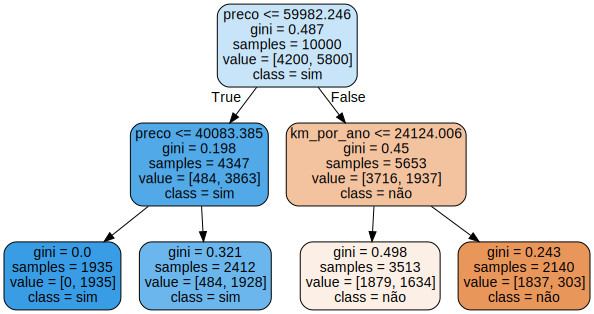

In [36]:
features = x_azar.columns

modelo.fit(x_azar, y_azar)
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico

## Testando Parâmetros

In [37]:
def testando_maxdepth(max_D):
  SEED = 42
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)

  modelo = DecisionTreeClassifier(max_depth = max_D)
  results = cross_validate(modelo, x_azar, y_azar,groups = dados.modelo_aleatorio,  cv = cv, return_train_score=True)
  return([max_D,results['test_score'].mean(),results['train_score'].mean()])

resultados = [testando_maxdepth(i) for i in range(1,32)]

dados_r = pd.DataFrame(resultados, columns=['profundidade','teste','treino'])


In [38]:
dados_r.head(2)

,profundidade,teste,treino
0,1,0.757518,0.757921
1,2,0.757518,0.757921


O motivo pelo qual ao aumentar a profundidade ocorre diminuição da acurácia do modelo é: Estamos realizando uma treino extensivo, e isto torna o modelo "viciado" nos dados do modelo. Quando é passado os dados de teste, o modelo passa a errar mais do que quando fazemos poucos treinos. Este fenômeno é chamado de Overfit

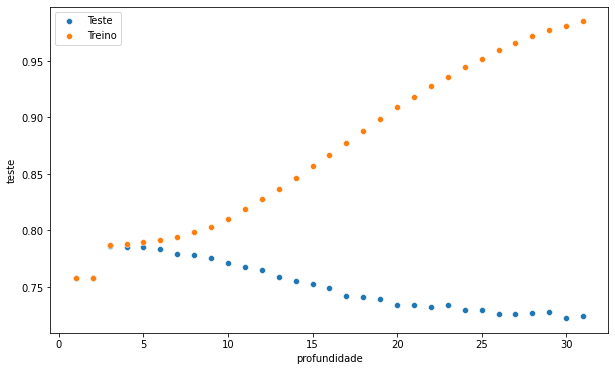

In [39]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'profundidade',y='teste', data = dados_r)
sns.scatterplot(x = 'profundidade',y='treino', data = dados_r)
plt.legend(['Teste','Treino'])

## 2 dimensões de hiperparâmetros 

In [42]:
def hiper_2D(max_D, min_samples_l):
  SEED = 42
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)

  modelo = DecisionTreeClassifier(max_depth = max_D, min_samples_leaf=min_samples_l)
  results = cross_validate(modelo, x_azar, y_azar,groups = dados.modelo_aleatorio,  cv = cv, return_train_score=True)
  return([max_D,min_samples_l,results['test_score'].mean(),results['train_score'].mean()])

resultados = []
for D in range(1,33):
  for M in range(1,33):
    resultados.append(hiper_2D(M, D))

dados_r = pd.DataFrame(resultados, columns=['profundidade','minimo_leaf','teste','treino'])

In [47]:
dados_r.sort_values('teste', ascending = False).head()

,profundidade,minimo_leaf,teste,treino
130,3,5,0.786531,0.787521
162,3,6,0.786531,0.787521
834,3,27,0.786531,0.787521
930,3,30,0.786531,0.787521
290,3,10,0.786531,0.787521


In [48]:
dados_r.corr()

,profundidade,minimo_leaf,teste,treino
profundidade,1.000000e+00,-3.652992e-16,-0.575991,0.680732
minimo_leaf,-3.652992e-16,1.000000e+00,0.517323,-0.451818
teste,-5.759913e-01,5.173234e-01,1.000000,-0.780232
treino,6.807319e-01,-4.518178e-01,-0.780232,1.000000


array([[<Axes: xlabel='profundidade', ylabel='profundidade'>,
        <Axes: xlabel='minimo_leaf', ylabel='profundidade'>,
        <Axes: xlabel='teste', ylabel='profundidade'>,
        <Axes: xlabel='treino', ylabel='profundidade'>],
       [<Axes: xlabel='profundidade', ylabel='minimo_leaf'>,
        <Axes: xlabel='minimo_leaf', ylabel='minimo_leaf'>,
        <Axes: xlabel='teste', ylabel='minimo_leaf'>,
        <Axes: xlabel='treino', ylabel='minimo_leaf'>],
       [<Axes: xlabel='profundidade', ylabel='teste'>,
        <Axes: xlabel='minimo_leaf', ylabel='teste'>,
        <Axes: xlabel='teste', ylabel='teste'>,
        <Axes: xlabel='treino', ylabel='teste'>],
       [<Axes: xlabel='profundidade', ylabel='treino'>,
        <Axes: xlabel='minimo_leaf', ylabel='treino'>,
        <Axes: xlabel='teste', ylabel='treino'>,
        <Axes: xlabel='treino', ylabel='treino'>]], dtype=object)

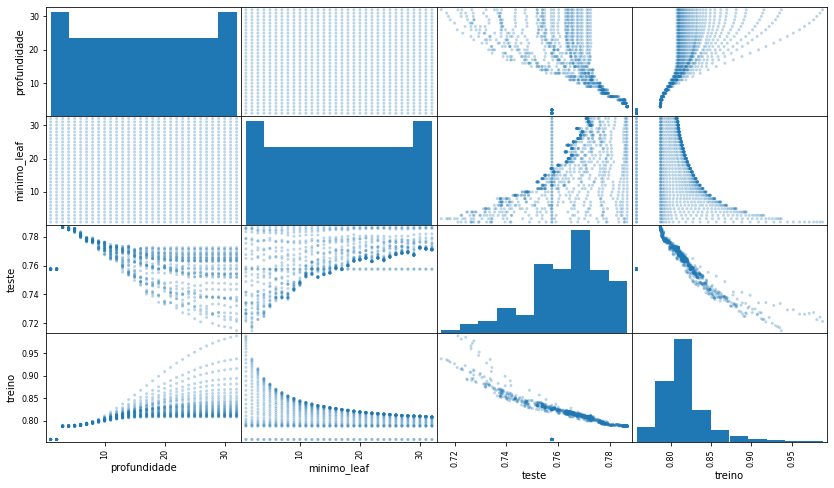

In [51]:
pd.plotting.scatter_matrix(dados_r, figsize = (14,8), alpha = 0.3)

<Axes: >

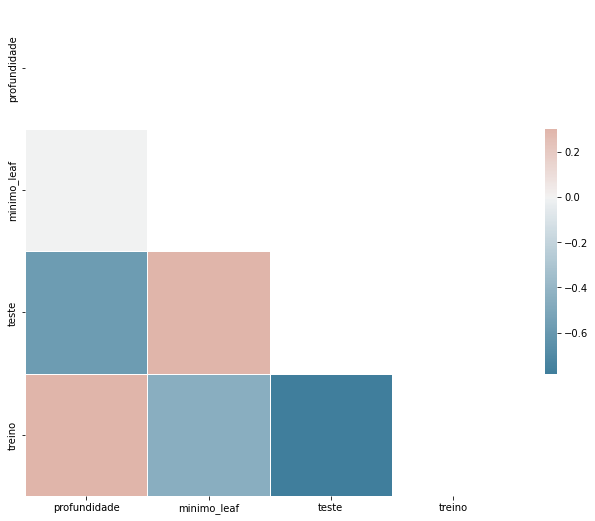

In [53]:
corr = dados_r.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

* Usando correlação entre treino e teste para os hiperparâmetros me guio para explorar outros valores do grid 2D de max_depht e min_samples_leaf. 
* Esta é uma forma de explorar as dimensões e encontrar um valor melhor para o modelo. Não é uma garantir de ser a melhor combinação de valores. 